In [2]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# 보다 편리한 데이타 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

In [6]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3,random_state=0).fit(iris.data)
gmm_cluster_label =gmm.predict(iris.data)

irisDF['gmm_c']= gmm_cluster_label
iris_result = irisDF.groupby(['target'])['gmm_c'].value_counts()
print(iris_result)

target  gmm_c
0       0        50
1       1        45
        2         5
2       2        50
Name: gmm_c, dtype: int64


In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
km= KMeans(n_clusters=3,init='k-means++',max_iter=300,random_state=0).fit(iris.data)
km_pred = km.predict(iris.data)
irisDF['km_c']= km_pred
iris_re = irisDF.groupby(['target'])['km_c'].value_counts()
print(iris_re)

target  km_c
0       1       50
1       2       48
        0        2
2       0       36
        2       14
Name: km_c, dtype: int64


In [32]:
def visualize_c_p(cluster,df,label,iscenter=True):
    if iscenter:
        centers=cluster.cluster_centers_
    
    u_label = np.unique(df[label].values)
    marker=['o','s','^','x','*']
    isNoise=False
    for la in u_label:
        la_cl = df[df[label]==la]
        # dbscan을 표시하기 위한 것 
        if label==-1:
            cluster_legend ='Noise'
            isNoise=True
        else:
            cluster_legend = 'Cluster'+str(la)
        
        plt.scatter(x=la_cl['ftr1'],y=la_cl['ftr2'],s=70, edgecolor='k'
                   ,marker=marker[la],label=cluster_legend)
        
        if iscenter:
            cen_ =centers[la]
            plt.scatter(x=cen_[0],y=cen_[1],s=200,color='white',alpha=0.9,
                       edgecolor='k',marker=marker[la])
            plt.scatter(x=cen_[0], y=cen_[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % la)
        if isNoise:
            legend_loc='upper center'
        else:
            legend_loc='upper right'
        
    plt.legend(loc=legend_loc)
    plt.show()
    

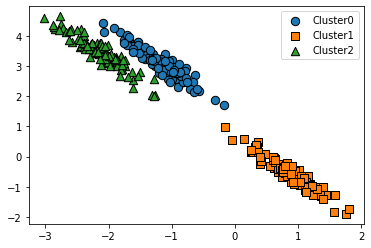

In [41]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 길게 늘어난 타원형의 데이터 셋을 생성하기 위해 변환함. 
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
visualize_c_p(None, clusterDF, 'target', iscenter=False)

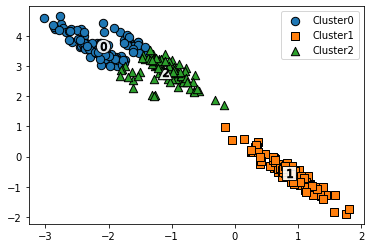

In [42]:
# Kmeans
kmeans = KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label

visualize_c_p(kmeans, clusterDF, 'kmeans_label',iscenter=True)

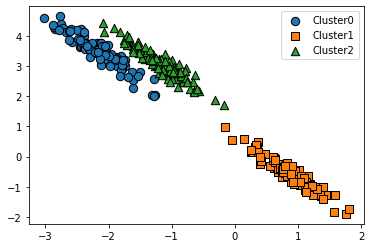

In [43]:
# gmm
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit_predict(X_aniso)
clusterDF['gmm_label'] = gmm_label

visualize_c_p(gmm, clusterDF, 'gmm_label',iscenter=False)

In [44]:
print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('\n### Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: kmeans_label, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64
